<a href="https://colab.research.google.com/github/dinasoltanit/masters-projects/blob/master/LBM_MixingLength_Cylinder_v05_Re100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flow Past Cylinder With Variable Viscosity (for an isothermal fluid)

In [36]:
# Importing Libraries
from numpy import *
from numpy.linalg import *
import matplotlib.pyplot as plt
from matplotlib import cm

In [37]:
# Flow Parameters
maxIter = 20000 # Total number of time iterations.
Re      = 100  # Reynolds number.
T = 273 + 15 # Temperature for isothermal fluid

# Velocity in lattice units
uLB     = 0.06

# Calculate Mach
Cs = 0.577
Ma = uLB / Cs
if (Ma >= 0.3):
  print("Ma = " + str(Ma) + "Error!")
else:
  print(Ma)

0.10398613518197573


In [38]:
ny = 180
ly=ny-1.0
q = 9

# Coordinates of the cylinder
cy=ny/2
r=ny/9
print(r)

# nu in lattice units
nulb = uLB * r / Re
print(nulb)

# Lattice test dimention
#nx_test = ceil(nulb * Re / uLB)
#print(nx_test)

20.0
0.012


In [39]:
nx = 520
cx = nx/4

In [40]:
# Calculate the Tau based on Prandtl's Mixing Length Turbulence Model
Dh = 2*r
Gammaa = 0.22
lmix = Gammaa * Dh # Mixing Length - Based on flow on flat plate
kappaa = 0.41 # Von-Karman Number
omega0 = 1.0 / (3.*nulb+0.5) # Relaxation parameter.
print(1/omega0)

0.536


In [41]:
# Lattice Constants Definition
c = array([(x,y) for x in [0,-1,1] for y in [0,-1,1]]) # Lattice velocities.
t = 1./36. * ones(q)  
#t = 1./36. * ones(q, dtype=float128)                                   # Lattice weights.
t[asarray([norm(ci)<1.1 for ci in c])] = 1./9.
t[0] = 4./9.
noslip = [c.tolist().index((-c[i]).tolist()) for i in range(q)] 
i1 = arange(q)[asarray([ci[0]<0  for ci in c])] # Unknown on right wall.
i2 = arange(q)[asarray([ci[0]==0 for ci in c])] # Vertical middle.
i3 = arange(q)[asarray([ci[0]>0  for ci in c])] # Unknown on left wall.

In [42]:
# Function Definition
sumpop = lambda fin: sum(fin,axis=0) # Helper function for density computation.
def equilibrium(rho,u):              # Equilibrium distribution function.
    cu   = 3.0 * dot(c,u.transpose(1,0,2))
    usqr = 3./2.*(u[0]**2+u[1]**2)
    feq = zeros((q,nx,ny))
    for i in range(q): feq[i,:,:] = rho*t[i]*(1.+cu[i]+0.5*cu[i]**2-usqr)
    return feq

def updateOmega (rho):
    # Update tau
    rho_avg = average(rho)
    Q = (kappaa * lmix)**2 / (2 * rho_avg * T**2)
    omega = (2*omega0) / (sqrt(1 + 4* Q* omega0**2) + 1)
    print(1/omega)
    return omega

In [43]:
# Setup: cylindrical obstacle and velocity inlet with perturbation
obstacle = fromfunction(lambda x,y: (x-cx)**2+(y-cy)**2<r**2, (nx,ny))
vel = fromfunction(lambda d,x,y: (1-d)*uLB*(1.0+1e-4*sin(y/ly*2*pi)),(2,nx,ny))
feq = equilibrium(1.0,vel); fin = feq.copy()

0.5361463641521635


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641521635
0.5361463641

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361463237029613
0.5361463236780376
0.5361463236668443
0.5361463236701789
0.5361463236887193
0.5361463237231663
0.53614632377408
0.536146323842029
0.5361463239274217
0.5361463240306633
0.5361463241519856
0.5361463242916096
0.5361463244495731
0.5361463246259028
0.5361463248204374
0.536146325033008
0.5361463252632579
0.5361463255108315
0.536146325775189
0.536146326055803
0.5361463263519685
0.536146326663007
0.5361463269880703
0.5361463273263526
0.5361463276768856
0.5361463280387614
0.536146328410917
0.5361463287923658
0.5361463291819744
0.5361463295787013
0.5361463299813655
0.5361463303888921
0.5361463308000719
0.5361463312138169
0.5361463316289081
0.5361463320442609
0.5361463324586625
0.536146332871048
0.5361463332802268
0.5361463336851677
0.5361463340847177
0.5361463344778965
0.5361463348636045
0.5361463352409297
0.5361463356088451
0.5361463359665267
0.5361463363130405
0.5361463366476719
0.5361463369696015
0.5361463372782446
0.5361463375729169
0.5361463378531824
0.5361463381185079
0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361464223525534
0.5361464222915554
0.5361464222296959
0.5361464221669505
0.536146422103301
0.5361464220387336
0.5361464219732398
0.536146421906815
0.536146421839458
0.536146421771171
0.536146421701959
0.5361464216318292
0.536146421560791
0.5361464214888548
0.536146421416033
0.536146421342339
0.5361464212677874
0.5361464211923939
0.5361464211161753
0.5361464210391499
0.5361464209613377
0.5361464208827605
0.5361464208034423
0.5361464207234101
0.536146420642694
0.5361464205613283
0.5361464204793513
0.5361464203968072
0.536146420313745
0.536146420230221
0.5361464201462981
0.5361464200620473
0.536146419977548
0.5361464198928877
0.5361464198081645
0.5361464197234853
0.5361464196389678
0.5361464195547394
0.5361464194709383
0.5361464193877132
0.536146419305223
0.5361464192236366
0.5361464191431329
0.5361464190638991
0.5361464189861322
0.5361464189100361
0.5361464188358219
0.5361464187637058
0.5361464186939099
0.536146418626659
0.5361464185621801
0.5361464185007012
0.5361464184424496
0.53614

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361464710983455
0.5361464710582599
0.5361464710183907
0.5361464709789266
0.5361464709400552
0.5361464709019637
0.5361464708648372
0.5361464708288592
0.5361464707942099
0.5361464707610666
0.5361464707296023
0.5361464706999867
0.5361464706723831
0.5361464706469506
0.5361464706238419
0.5361464706032035
0.5361464705851748
0.5361464705698881
0.5361464705574679
0.5361464705480309
0.5361464705416848
0.536146470538529
0.5361464705386535
0.5361464705421389
0.5361464705490564
0.5361464705594667
0.5361464705734209
0.5361464705909598
0.5361464706121136
0.5361464706369019
0.5361464706653342
0.5361464706974087
0.5361464707331138
0.5361464707724266
0.5361464708153141
0.5361464708617327
0.5361464709116288
0.5361464709649385
0.536146471021588
0.536146471081494
0.5361464711445637
0.5361464712106954
0.5361464712797783
0.5361464713516936
0.5361464714263143
0.5361464715035058
0.5361464715831263
0.5361464716650276
0.5361464717490547
0.5361464718350476
0.5361464719228404
0.5361464720122625
0.5361464721031

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361465216819271
0.5361465217033283
0.5361465217248825
0.5361465217465443
0.5361465217682666
0.5361465217900007
0.536146521811697
0.5361465218333042
0.5361465218547714
0.5361465218760455
0.5361465218970743
0.5361465219178047
0.5361465219381835
0.5361465219581584
0.536146521977677
0.5361465219966877
0.5361465220151398
0.5361465220329836
0.5361465220501709
0.5361465220666545
0.5361465220823892
0.5361465220973315
0.53614652211144
0.5361465221246752
0.5361465221370001
0.5361465221483803
0.5361465221587834
0.5361465221681808
0.5361465221765451
0.5361465221838537
0.5361465221900854
0.5361465221952232
0.5361465221992527
0.5361465222021629
0.5361465222039462
0.5361465222045981
0.5361465222041176
0.5361465222025071
0.5361465221997722
0.536146522195922
0.5361465221909689
0.5361465221849289
0.5361465221778206
0.5361465221696665
0.5361465221604922
0.5361465221503262
0.5361465221392
0.5361465221271484
0.536146522114209
0.5361465221004219
0.5361465220858304
0.53614652207048
0.5361465220544187
0.53

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361465645045046
0.5361465645231741
0.5361465645415262
0.5361465645595799
0.5361465645773554
0.5361465645948746
0.53614656461216
0.5361465646292357
0.536146564646127
0.53614656466286
0.5361465646794621
0.5361465646959612
0.5361465647123866
0.5361465647287682
0.5361465647451364
0.5361465647615226
0.5361465647779582
0.5361465647944759
0.5361465648111083
0.5361465648278883
0.5361465648448488
0.5361465648620235
0.5361465648794457
0.5361465648971486
0.5361465649151652
0.5361465649335286
0.5361465649522715
0.5361465649714257
0.5361465649910231
0.5361465650110947
0.5361465650316706
0.5361465650527805
0.536146565074453
0.5361465650967158
0.5361465651195955
0.5361465651431176
0.5361465651673066
0.5361465651921851
0.536146565217775
0.5361465652440965
0.5361465652711682
0.5361465652990074
0.5361465653276293
0.536146565357048
0.5361465653872753
0.536146565418322
0.5361465654501962
0.5361465654829044
0.5361465655164517
0.5361465655508405
0.5361465655860717
0.5361465656221444
0.536146565659055
0.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.536146602388785
0.5361466024002787
0.5361466024114822
0.5361466024223895
0.5361466024329948
0.5361466024432924
0.5361466024532756
0.5361466024629391
0.5361466024722765
0.5361466024812821
0.5361466024899499
0.5361466024982744
0.5361466025062498
0.5361466025138707
0.5361466025211319
0.5361466025280284
0.5361466025345553
0.5361466025407083
0.5361466025464832
0.5361466025518759
0.5361466025568832
0.5361466025615018
0.536146602565729
0.5361466025695626
0.5361466025730008
0.5361466025760422
0.5361466025786862
0.5361466025809324
0.5361466025827809
0.5361466025842329
0.5361466025852898
0.5361466025859534
0.5361466025862268
0.5361466025861131
0.5361466025856165
0.5361466025847414
0.5361466025834934
0.5361466025818785
0.5361466025799037
0.5361466025775756
0.5361466025749032
0.536146602571895
0.5361466025685605
0.53614660256491
0.5361466025609544
0.5361466025567052
0.5361466025521748
0.5361466025473763
0.5361466025423228
0.5361466025370291
0.5361466025315096
0.53614660252578
0.536146602519856
0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361466284569257
0.5361466284785559
0.5361466285002452
0.5361466285219832
0.5361466285437603
0.5361466285655664
0.5361466285873924
0.5361466286092295
0.5361466286310684
0.5361466286529013
0.53614662867472
0.5361466286965172
0.5361466287182852
0.5361466287400177
0.5361466287617079
0.5361466287833497
0.5361466288049377
0.5361466288264662
0.5361466288479304
0.5361466288693256
0.5361466288906478
0.5361466289118929
0.5361466289330573
0.536146628954138
0.536146628975132
0.5361466289960369
0.5361466290168502
0.5361466290375703
0.5361466290581953
0.5361466290787239
0.5361466290991552
0.5361466291194883
0.5361466291397226
0.5361466291598576
0.5361466291798933
0.5361466291998297
0.536146629219667
0.5361466292394059
0.5361466292590465
0.5361466292785899
0.5361466292980368
0.5361466293173879
0.5361466293366445
0.5361466293558076
0.5361466293748783
0.5361466293938579
0.5361466294127475
0.5361466294315486
0.5361466294502623
0.5361466294688897
0.5361466294874321
0.5361466295058908
0.536146629524266

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361466143261729
0.5361466142882868
0.536146614250275
0.5361466142121397
0.5361466141738828
0.5361466141355066
0.536146614097013
0.5361466140584042
0.5361466140196822
0.536146613980849
0.5361466139419062
0.5361466139028561
0.5361466138637002
0.5361466138244404
0.5361466137850783
0.5361466137456157
0.5361466137060539
0.5361466136663946
0.5361466136266393
0.5361466135867892
0.5361466135468457
0.5361466135068099
0.536146613466683
0.536146613426466
0.5361466133861598
0.5361466133457654
0.5361466133052838
0.5361466132647152
0.5361466132240608
0.5361466131833208
0.5361466131424958
0.5361466131015864
0.5361466130605925
0.5361466130195148
0.5361466129783534
0.5361466129371084
0.5361466128957798
0.5361466128543677
0.5361466128128721
0.5361466127712929
0.5361466127296298
0.536146612687883
0.536146612646052
0.5361466126041368
0.5361466125621369
0.5361466125200526
0.5361466124778832
0.5361466124356286
0.5361466123932886
0.536146612350863
0.5361466123083519
0.5361466122657548
0.5361466122230719
0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5361464002023593
0.536146400130173
0.5361464000582645
0.5361463999866305
0.5361463999152667
0.5361463998441687
0.5361463997733323
0.5361463997027524
0.5361463996324238
0.5361463995623414
0.5361463994924993
0.5361463994228917
0.5361463993535123
0.5361463992843547
0.5361463992154123
0.5361463991466782
0.5361463990781452
0.5361463990098059
0.5361463989416527
0.536146398873678
0.5361463988058737
0.5361463987382314
0.5361463986707433
0.5361463986034005
0.5361463985361943
0.536146398469116
0.5361463984021568
0.5361463983353076
0.5361463982685593
0.5361463982019025
0.5361463981353279
0.5361463980688264
0.5361463980023882
0.5361463979360043
0.5361463978696648
0.5361463978033604
0.5361463977370817
0.5361463976708191
0.5361463976045633
0.5361463975383047
0.5361463974720343
0.5361463974057427
0.5361463973394206
0.5361463972730592
0.5361463972066496
0.5361463971401828
0.5361463970736502
0.5361463970070433
0.5361463969403536
0.5361463968735732
0.5361463968066941
0.5361463967397082
0.5361463966726

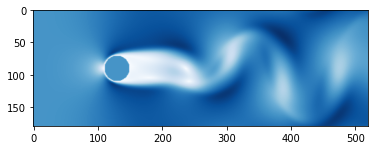

In [44]:
# Main Time Loop
for time in range(maxIter):
    fin[i1,-1,:] = fin[i1,-2,:] # Right wall: outflow condition.
    rho = sumpop(fin)           # Calculate macroscopic density and velocity.
    u = dot(c.transpose(), fin.transpose((1,0,2)))/rho

    u[:,0,:] =vel[:,0,:] # Left wall: compute density from known populations.
    rho[0,:] = 1./(1.-u[0,0,:]) * (sumpop(fin[i2,0,:])+2.*sumpop(fin[i1,0,:]))

    feq = equilibrium(rho,u) # Left wall: Zou/He boundary condition.
    fin[i3,0,:] = fin[i1,0,:] + feq[i3,0,:] - fin[i1,0,:]
    
    omega = updateOmega(rho)
    
    fout = fin - omega * (fin - feq)  # Collision step.
    for i in range(q): fout[i,obstacle] = fin[noslip[i],obstacle]
    for i in range(q): # Streaming step.
        fin[i,:,:] = roll(roll(fout[i,:,:],c[i,0],axis=0),c[i,1],axis=1)
 
    from google.colab import files
    if (time%2000==0): # Visualization
        plt.clf()
        plt.imshow(sqrt(u[0]**2+u[1]**2).transpose(),cmap=cm.Blues)
        plt.savefig("Re100_v1_vel."+str(time)+".png")
        files.download("Re100_v1_vel."+str(time)+".png")